In [1]:
import numpy
from joblib import dump, load
import scipy.stats
import matplotlib.pyplot
%matplotlib inline

In [2]:
x = numpy.load('./data/x.npy')
y = numpy.load('./data/y.npy')

In [3]:
tmp_idx = (numpy.sqrt((x[:, 0] - 51.4545) ** 2 + (x[:, 1] + 2.5879) ** 2) <= 0.1)  

In [4]:
x_local = x[tmp_idx, :]
y_local = y[tmp_idx]
x_back = x[~tmp_idx, :]
y_back = y[~tmp_idx]

In [5]:
pi = numpy.array([numpy.sum(tmp_idx), numpy.sum(~tmp_idx)])
pi = pi / numpy.sum(pi)

In [6]:
from sklearn.mixture import GaussianMixture

In [7]:
local_gmm = GaussianMixture(n_components=4, covariance_type='spherical')
local_gmm.fit(x_local)

GaussianMixture(covariance_type='spherical', n_components=4)

In [8]:
back_gmm = GaussianMixture(n_components=32, covariance_type='spherical')
back_gmm.fit(x_back)

GaussianMixture(covariance_type='spherical', n_components=32)

In [9]:
y_all_grid = numpy.linspace(-6, 2, 1024)
x_all_grid = numpy.linspace(50, 58, 1024)
xx_all, yy_all = numpy.meshgrid(x_all_grid, y_all_grid)

In [10]:
back_d = numpy.exp(back_gmm.score_samples(numpy.hstack([xx_all.reshape(-1, 1), yy_all.reshape(-1, 1)])))
local_d = numpy.exp(local_gmm.score_samples(numpy.hstack([xx_all.reshape(-1, 1), yy_all.reshape(-1, 1)])))

In [11]:
p_back = (pi[1] * back_d / (pi[1] * back_d + pi[0] * local_d)).reshape(1024, 1024)

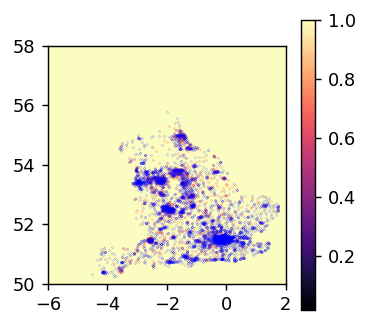

In [12]:
matplotlib.pyplot.figure(dpi=128, figsize=(3, 3))
matplotlib.pyplot.imshow(p_back.transpose(), origin='lower', cmap='magma',
                         extent=[-6, 2, 50, 58])#, vmin=0, vmax=1)
matplotlib.pyplot.plot(x[y==1, 1], x[y==1, 0], 'ro', markersize=0.1)
matplotlib.pyplot.plot(x[y==0, 1], x[y==0, 0], 'bo', markersize=0.1)
matplotlib.pyplot.xlim([-6, 2])
matplotlib.pyplot.ylim([50, 58])
matplotlib.pyplot.colorbar()

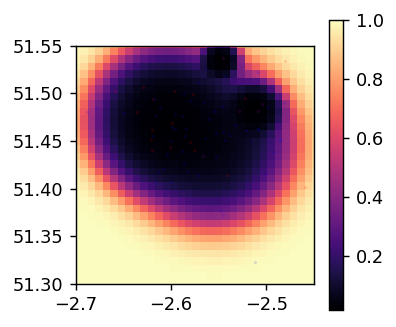

In [13]:
matplotlib.pyplot.figure(dpi=128, figsize=(3, 3))
matplotlib.pyplot.imshow(p_back.transpose(), origin='lower', cmap='magma',
                         extent=[-6, 2, 50, 58])#, vmin=0, vmax=1)
matplotlib.pyplot.plot(x[y==1, 1], x[y==1, 0], 'ro', markersize=0.1)
matplotlib.pyplot.plot(x[y==0, 1], x[y==0, 0], 'bo', markersize=0.1)
matplotlib.pyplot.xlim([-2.7, -2.45])
matplotlib.pyplot.ylim([51.3, 51.55])
matplotlib.pyplot.colorbar()

In [14]:
mdl = load('./local_mdl.joblib')
p_local = mdl.predict_proba(numpy.hstack([xx_all.reshape(-1, 1), yy_all.reshape(-1, 1)]))[:, 1].reshape(1024, 1024)

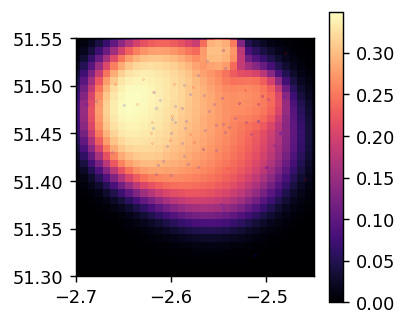

In [15]:
matplotlib.pyplot.figure(dpi=128, figsize=(3, 3))
matplotlib.pyplot.imshow(p_local.transpose() * (1 - p_back.transpose()) , origin='lower', cmap='magma',
                         extent=[-6, 2, 50, 58])#, vmin=0, vmax=1)
matplotlib.pyplot.plot(x[y==1, 1], x[y==1, 0], 'ro', markersize=0.1)
matplotlib.pyplot.plot(x[y==0, 1], x[y==0, 0], 'bo', markersize=0.1)
matplotlib.pyplot.xlim([-2.7, -2.45])
matplotlib.pyplot.ylim([51.3, 51.55])
matplotlib.pyplot.colorbar()